In [28]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets

In [4]:
import seaborn as sns

In [53]:
iris=sns.load_dataset('iris')

In [54]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [13]:
features=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
features

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [16]:
x = iris.loc[:, features].values
y = iris.loc[:,['species']].values



In [25]:
from sklearn.decomposition import PCA
pca=PCA(n_components=3)


In [26]:
principalComponents=pca.fit_transform(x)

In [30]:
principalDf=pd.DataFrame(data=principalComponents,columns=['principal component 1', 'principal component 2', 'principal component 3'])

In [31]:
principalDf

,principal component 1,principal component 2,principal component 3
0,-2.684126,0.319397,-0.027915
1,-2.714142,-0.177001,-0.210464
2,-2.888991,-0.144949,0.017900
3,-2.745343,-0.318299,0.031559
4,-2.728717,0.326755,0.090079
...,...,...,...
145,1.944110,0.187532,0.177825
146,1.527167,-0.375317,-0.121898
147,1.764346,0.078859,0.130482
148,1.900942,0.116628,0.723252


In [36]:
final=pd.concat([principalDf,iris[['species']]], axis=1)

In [37]:
x_val=final['principal component 1']
y_val=final['principal component 2']
z_val=final['principal component 3']

In [49]:
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

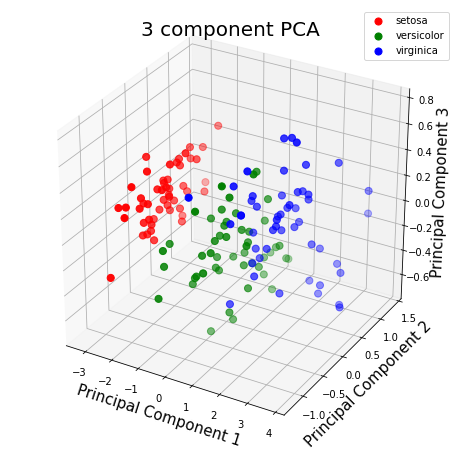

In [55]:
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(111,projection='3d')
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)
targets = ['setosa', 'versicolor', 'virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = final['species'] == target
    ax.scatter(final.loc[indicesToKeep, 'principal component 1']
               , final.loc[indicesToKeep, 'principal component 2']
               , final.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
plt.show()